In [281]:
%matplotlib inline
from PIL import Image
import numpy as np
import math
from scipy import signal
from matplotlib.pyplot import imshow, subplot, figure, plot

## Part 1: Gaussian Filtering

#### Question 1
! - Note that the assertion error is intentional as was shown in the question sheets.

In [442]:
# input: the desired width of the square filter
# returns: a numpy array of normalized values.
# throws: AssertionError if number is not odd, not positive or not an integer
def boxfilter(n):
    assert(n%2 != 0), 'Size a given is not odd.'
    assert(n > 0), 'Size given is not positive.'
    return np.ones((n, n))/(n*n)    

print('Result for n=3:\n' + str(boxfilter(3)))
print()
print('Result for n=5:\n' + str(boxfilter(5)))
print()
print('Result for n=4:\n' + str(boxfilter(4)))

Result for n=3:
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]

Result for n=5:
[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]



AssertionError: Size a given is not odd.

#### Question 2

In [243]:
# input: a number
# returns the next odd integer
def roundToNextOdd(x):
    return np.ceil(x)//2*2+1

# input: a number
# returns: a numpy array that replicates a 1D Gaussian filter
def gauss1d(sigma):
    length = np.round(roundToNextOdd(sigma*6)/2)
    x_vals = np.arange(-length+1, length)
    g_filter = np.exp(- pow(x_vals, 2) / (2*pow(sigma, 2)))
    return g_filter/sum(g_filter)

In [443]:
print('Gauss1D with 0.3:\n' + str(gauss1d(0.3)))
print()
print('Gauss1D with 0.5:\n' + str(gauss1d(0.5)))
print()
print('Gauss1D with 1.0:\n' + str(gauss1d(1.0)))
print()
print('Gauss1D with 2.0:\n' + str(gauss1d(2.0)))

Gauss1D with 0.3:
[ 0.00383626  0.99232748  0.00383626]

Gauss1D with 0.5:
[ 0.10650698  0.78698604  0.10650698]

Gauss1D with 1.0:
[ 0.00443305  0.05400558  0.24203623  0.39905028  0.24203623  0.05400558
  0.00443305]

Gauss1D with 2.0:
[ 0.00881223  0.02714358  0.06511406  0.12164907  0.17699836  0.20056541
  0.17699836  0.12164907  0.06511406  0.02714358  0.00881223]


#### Question 3

In [308]:
# input: a number
# returns: a 2D numpy array that replicates a 2D Gaussian filter
def gauss2d(sigma):
    g1d = gauss1d(sigma)
    g1d = g1d[np.newaxis]
    g2d = signal.convolve2d(g1d.transpose(), g1d)
    return g2d

In [444]:
print('Gauss1D with 0.5:\n' + str(gauss2d(0.5)))
print()
print('Gauss1D with 1.0:\n' + str(gauss2d(1.0)))

Gauss1D with 0.5:
[[ 0.01134374  0.08381951  0.01134374]
 [ 0.08381951  0.61934703  0.08381951]
 [ 0.01134374  0.08381951  0.01134374]]

Gauss1D with 1.0:
[[  1.96519161e-05   2.39409349e-04   1.07295826e-03   1.76900911e-03
    1.07295826e-03   2.39409349e-04   1.96519161e-05]
 [  2.39409349e-04   2.91660295e-03   1.30713076e-02   2.15509428e-02
    1.30713076e-02   2.91660295e-03   2.39409349e-04]
 [  1.07295826e-03   1.30713076e-02   5.85815363e-02   9.65846250e-02
    5.85815363e-02   1.30713076e-02   1.07295826e-03]
 [  1.76900911e-03   2.15509428e-02   9.65846250e-02   1.59241126e-01
    9.65846250e-02   2.15509428e-02   1.76900911e-03]
 [  1.07295826e-03   1.30713076e-02   5.85815363e-02   9.65846250e-02
    5.85815363e-02   1.30713076e-02   1.07295826e-03]
 [  2.39409349e-04   2.91660295e-03   1.30713076e-02   2.15509428e-02
    1.30713076e-02   2.91660295e-03   2.39409349e-04]
 [  1.96519161e-05   2.39409349e-04   1.07295826e-03   1.76900911e-03
    1.07295826e-03   2.39409349

#### Question 4
##### a. Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? HINT: Think of a situation in which ‘signal.convolve2d’ and ‘signal.correlate2d’ (with identical arguments) produce different results.

Scipy has two function because convolution and correlation are different operations, albeit, similar with a rotated filter. One computes the degree of overlap of two signal whereas the other is the degree of similarity between two signals. An example of same inputs that would result in different outputs using these two functions are the images in this exercise. 

In [459]:
## Illustrating the point above.
dog = Image.fromarray(im_dog)
cat = Image.fromarray(im_cat)
if(sum(sum(signal.correlate2d(dog.convert('L'), cat.convert('L'))-
   signal.convolve2d(dog.convert('L'), cat.convert('L')))) != 0):
    print("Not the same.")

Not the same.


In [458]:
# input: an image and a sigma for the gaussian filter
# returns: the image convolved with the 2D filter
def gaussconvolve2d(array, sigma):
    g2d = gauss2d(sigma)
    return signal.convolve2d(array, g2d, 'same')

##### b.

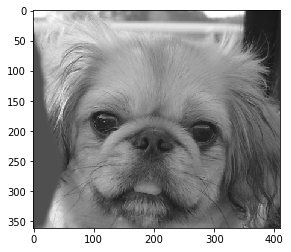

In [445]:
im = Image.open('dog.jpg');
im = im.convert('L');
imshow(im);

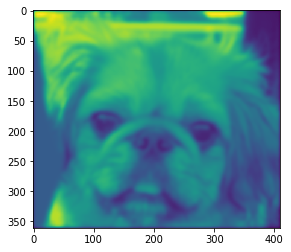

In [446]:
im = np.asarray(im);
conv_image = gaussconvolve2d(im, 3);
imshow(conv_image);

#### Question 5
#####  In a few sentences, explain how this could be implemented more efficiently taking advantage of separability and why, indeed, this would be faster. 

Could separate $$G(x,y)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2+y^2}{2\sigma^2}}$$
into
$$G_x(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$$ and $$G_y(y)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{y^2}{2\sigma^2}}$$
By separating the filter into this two operations less calculations are needed by only passing one filter in the horizontal direction and then one in the vertical direction or vice versa, instead of making more complex calculations at every x,y together.

## Part 2: Hybrid Images

In [447]:
# inputs: an RGB image, or 3D array and a sigma for how blurry the image should be
# returns: single RGB image with blur
def blurerRGB(img, sigma):
    r = Image.fromarray(gaussconvolve2d(img[:,:,0], sigma)).convert('L');
    g = Image.fromarray(gaussconvolve2d(img[:,:,1], sigma)).convert('L');
    b = Image.fromarray(gaussconvolve2d(img[:,:,2], sigma)).convert('L');
    bands = [r, g, b]
    return Image.merge('RGB', bands);

# input: two images
# effect: plots both images side by side


##### Question 1
Blurring out the dogs image by using the gaussianconvolve2d function with each layer from the RGB original and a sigma of 10.

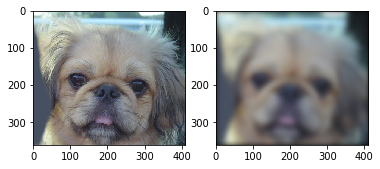

In [407]:
im_dog = Image.open('dog.jpg');
im_dog = np.asarray(im_dog);
sigma = 7;

blur_dog = blurerRGB(im_dog, sigma)/255;
plot2Images(im_dog, blur_dog)

##### Question 2
Blurring out cat image and then getting a low pass filtered image by substracting the high pass filter from the original image.

In [426]:
im_cat = Image.open('cat.jpg');
im_cat = np.asarray(im_cat);
blur_cat = blurerRGB(im_cat, sigma);
low_cat = im_cat-blur_cat+128

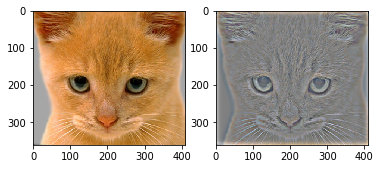

In [427]:
plot2Images(im_cat, low_cat);

##### Question 3
Combining the low pass and high pass images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


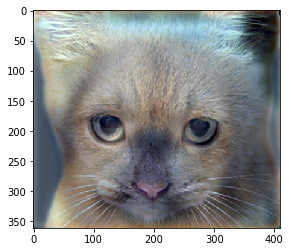

In [431]:
# sigma of 7
combo1 = np.asarray(blur_dog)/255+low_cat/255-0.5;
imshow(combo1);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


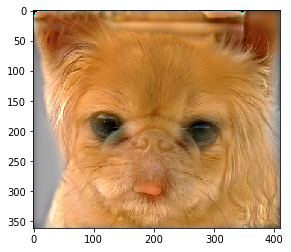

In [434]:
# sigma of 7 reversing the low and high frequency images
sigma = 7
low_dog = im_dog-blurerRGB(im_dog, sigma)+128;
combo2 = np.asarray(blur_cat)/255+low_dog/255-0.5;
imshow(combo2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


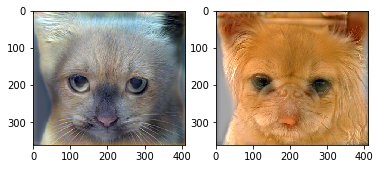

In [435]:
# for comparison
plot2Images(combo1, combo2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


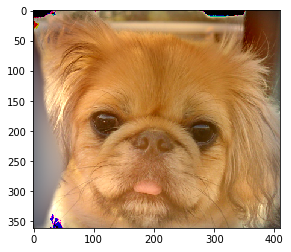

In [451]:
# different sigma 
sigma = 25
low_dog = im_dog-blurerRGB(im_dog, sigma)+128;
blur_cat = blurerRGB(im_cat, sigma)
combo3 = np.asarray(blur_cat)/255+low_dog/255-0.5;
imshow(combo3);